<a href="https://colab.research.google.com/github/andrii4k-kit/pytorch-learning/blob/main/04_custom_datasets_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Custom Dataset in PyTorch

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### 1. Get Data

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [ ]:
# Setup train/testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/pizza/2885050.jpg
Image class: pizza
Image height: 512
Image width: 512


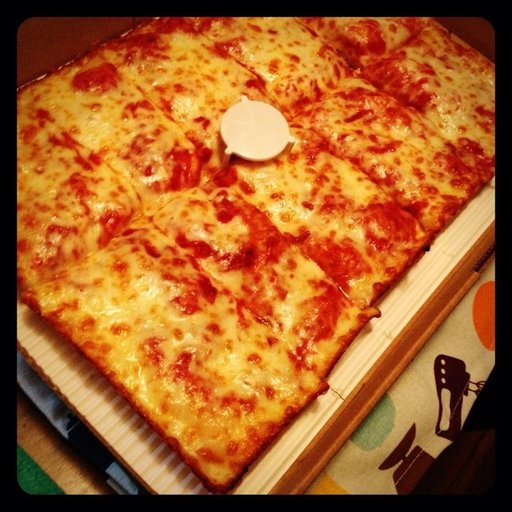

In [ ]:
import random
from PIL import Image


#random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

#### 2. Transforming Data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    # Resize the image to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn image to Tensor
    transforms.ToTensor()
    ])


In [ ]:
img_1 = data_transform(img)
img_1
#plt.imshow(img_1)

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0471,  ..., 0.0431, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0039, 0.0196,  ..., 0.0078, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0039, 0.0157,  ..., 0.0118, 0.0039, 0.0000],
         ...,
         [0.0000, 0.0039, 0.0392,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0118, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0157,  ..., 0.0157, 0.0078, 0.

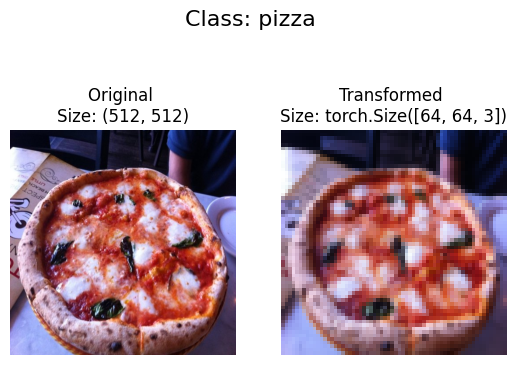

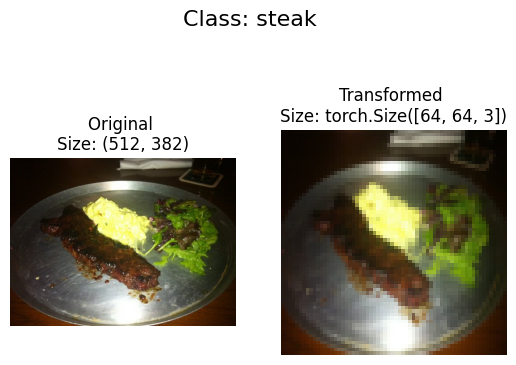

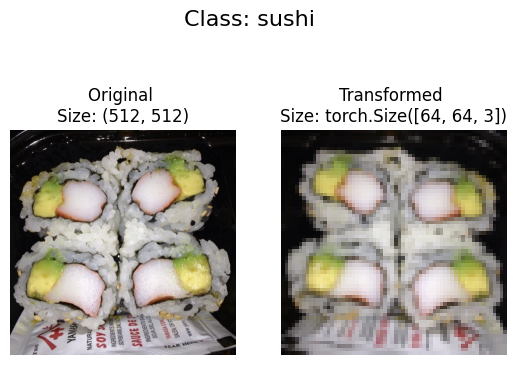

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, data_transform)

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


### 5. Loading image data with custom dataset

In [ ]:
import os
import pathlib
import torch


from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

from typing import Tuple, Dict, List

In [ ]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# Function to get class names

target_directory = train_dir
target_directory

class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Class names found: ['pizza', 'steak', 'sushi']


In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:

  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # Check up
  if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx


In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# Custom dataset class
from torch.utils.data import Dataset

# Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  def __init__(self,
               targ_dir: str,
               transform=None):
    # get image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # setup transform
    self.transform = transform
    # attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # image load function
  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
# Test our ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transform)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7dbf4f89c740>,
 <__main__.ImageFolderCustom at 0x7dbf41e09310>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
# Data augmentation

from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=70),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

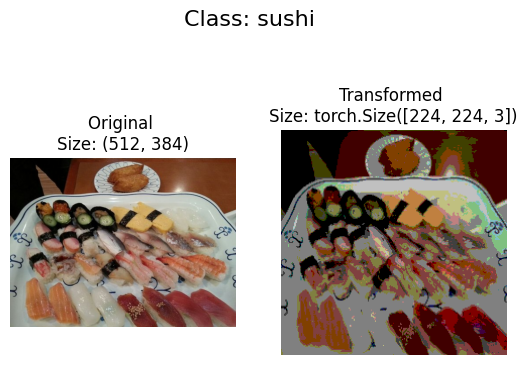

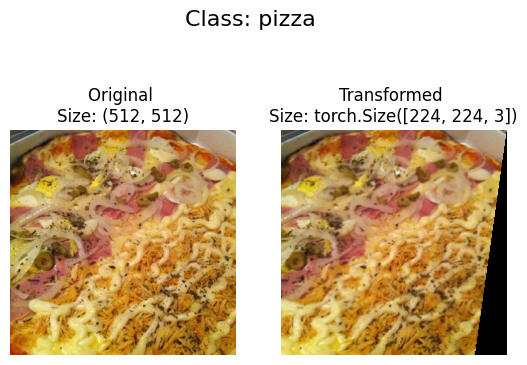

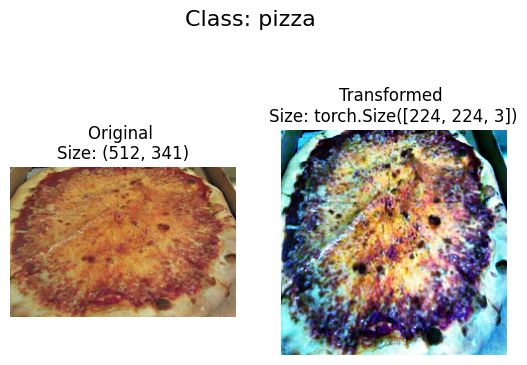

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

## Model 0: Tiny VGG without data Augmenantation

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=13),
    transforms.ToTensor()
])

In [ ]:
# Import and transform data
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=simple_transform)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform=simple_transform)

# create data loaders

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 64
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS)


In [ ]:
### Create TinyVGG model class
import torch
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x
        #return self.classifier(self.conv_block_2(self.conv_block_1(x)))



In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
X, y = next(iter(train_dataloader_simple))
y_logits = model_0(X.to(device))
y_logits
y_pred = torch.argmax(y_logits, dim=1)
y_pred

tensor([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

### Train and test loops fucntions



In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from rich.progress import track

# Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # Loop through training and testing steps for a number of epochs
    for epoch in track(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(
            model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # Print results
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )


        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    return results

## Train and evaluate Model0

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 30

# Instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Output()

Epoch: 1 | train_loss: 1.1074 | train_acc: 0.3379 | test_loss: 1.1424 | test_acc: 0.1953

Epoch: 2 | train_loss: 1.0967 | train_acc: 0.3414 | test_loss: 1.1190 | test_acc: 0.1484

Epoch: 3 | train_loss: 1.0969 | train_acc: 0.3443 | test_loss: 1.1137 | test_acc: 0.1484

Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3333 | test_loss: 1.0943 | test_acc: 0.1783

Epoch: 5 | train_loss: 1.0905 | train_acc: 0.4335 | test_loss: 1.1190 | test_acc: 0.2109

Epoch: 6 | train_loss: 1.0899 | train_acc: 0.3497 | test_loss: 1.1352 | test_acc: 0.1953

Epoch: 7 | train_loss: 1.0729 | train_acc: 0.4103 | test_loss: 1.0978 | test_acc: 0.2564

Epoch: 8 | train_loss: 1.0679 | train_acc: 0.5040 | test_loss: 1.0962 | test_acc: 0.2862

Epoch: 9 | train_loss: 1.0560 | train_acc: 0.4464 | test_loss: 1.0691 | test_acc: 0.2564

Epoch: 10 | train_loss: 1.0400 | train_acc: 0.4698 | test_loss: 1.0465 | test_acc: 0.4070

Exception ignored in: <function _releaseLock at 0x7dbfb04f5260>

def _releaseLock():

KeyboardInterrupt:

Epoch: 11 | train_loss: 1.0094 | train_acc: 0.5424 | test_loss: 1.0042 | test_acc: 0.5682

Epoch: 12 | train_loss: 0.9613 | train_acc: 0.5187 | test_loss: 1.0527 | test_acc: 0.4006

Epoch: 13 | train_loss: 0.9729 | train_acc: 0.5157 | test_loss: 1.0940 | test_acc: 0.3018

Epoch: 14 | train_loss: 0.9873 | train_acc: 0.5123 | test_loss: 0.9674 | test_acc: 0.4538

Epoch: 15 | train_loss: 0.9011 | train_acc: 0.5629 | test_loss: 0.9607 | test_acc: 0.5291

Epoch: 16 | train_loss: 0.9132 | train_acc: 0.5617 | test_loss: 1.1023 | test_acc: 0.3097

Epoch: 17 | train_loss: 0.9700 | train_acc: 0.5268 | test_loss: 1.1678 | test_acc: 0.2862

Epoch: 18 | train_loss: 0.9393 | train_acc: 0.5697 | test_loss: 0.9523 | test_acc: 0.4993

Epoch: 19 | train_loss: 0.9096 | train_acc: 0.5665 | test_loss: 1.0191 | test_acc: 0.3629

Epoch: 20 | train_loss: 0.9481 | train_acc: 0.5585 | test_loss: 1.0099 | test_acc: 0.3928

Epoch: 21 | train_loss: 0.9224 | train_acc: 0.5626 | test_loss: 1.1251 | test_acc: 0.3849

Epoch: 22 | train_loss: 0.8774 | train_acc: 0.5998 | test_loss: 1.1050 | test_acc: 0.2784

Epoch: 23 | train_loss: 0.9689 | train_acc: 0.5192 | test_loss: 1.0893 | test_acc: 0.3473

Epoch: 24 | train_loss: 0.8977 | train_acc: 0.6049 | test_loss: 1.0101 | test_acc: 0.4084

Epoch: 25 | train_loss: 0.9078 | train_acc: 0.5314 | test_loss: 0.9817 | test_acc: 0.4524

Epoch: 26 | train_loss: 0.8941 | train_acc: 0.5587 | test_loss: 1.0437 | test_acc: 0.4084

Epoch: 27 | train_loss: 0.8940 | train_acc: 0.5851 | test_loss: 0.9754 | test_acc: 0.4474

Epoch: 28 | train_loss: 0.9314 | train_acc: 0.5385 | test_loss: 1.0671 | test_acc: 0.3629

Epoch: 29 | train_loss: 0.9149 | train_acc: 0.5771 | test_loss: 0.9989 | test_acc: 0.3786

Epoch: 30 | train_loss: 0.9081 | train_acc: 0.5714 | test_loss: 0.9878 | test_acc: 0.4616

Total training time: 48.723 seconds


## Loss curves of Model 0

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    # Get the loss values of the results dictionary
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

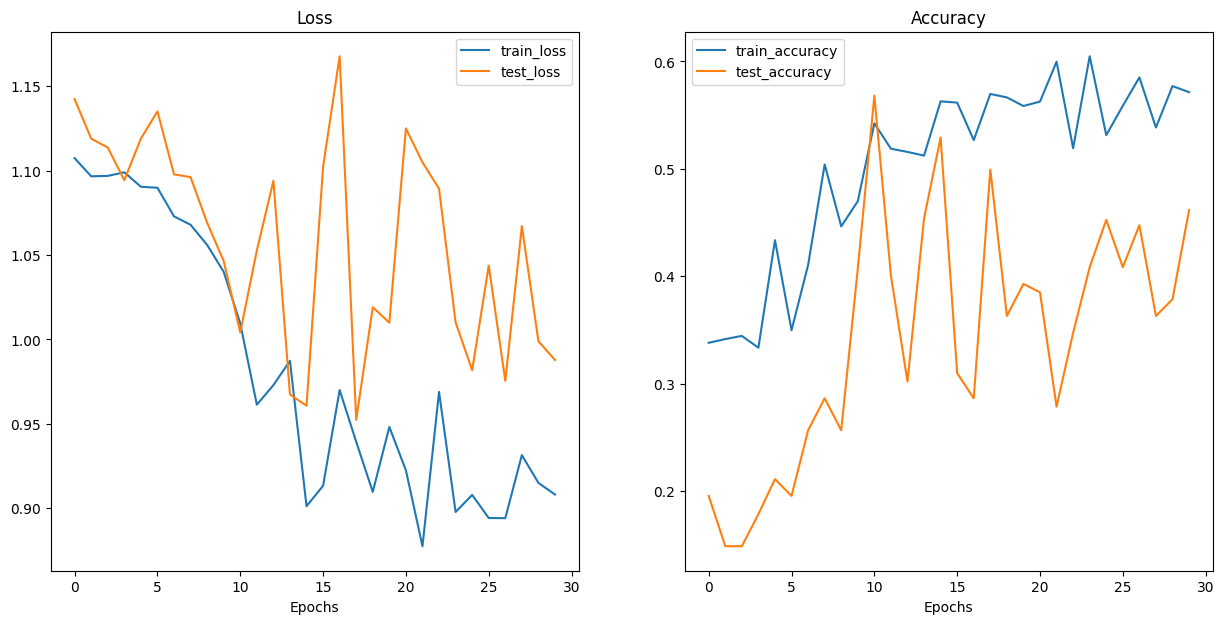

In [ ]:
plot_loss_curves(model_0_results)

## Model 1: Tiny VGG with data Augmenantation

In [ ]:
# create new transformers with Augmenantation
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=15),
    transforms.ToTensor()
])

test_data_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
# Datasets into DataLoaders
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                            transform=test_data_simple)

import os
BATCH_SIZE = 64
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7dbf685f5580>,
 <torch.utils.data.dataloader.DataLoader at 0x7dbf3fc5efc0>)

In [ ]:
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=32,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=3, bias=True)
  )
)

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 30

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.0003)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Output()

Epoch: 1 | train_loss: 1.0998 | train_acc: 0.2254 | test_loss: 1.0968 | test_acc: 0.4652

Epoch: 2 | train_loss: 1.0982 | train_acc: 0.3519 | test_loss: 1.1017 | test_acc: 0.1562

Epoch: 3 | train_loss: 1.0976 | train_acc: 0.3361 | test_loss: 1.1086 | test_acc: 0.1953

Epoch: 4 | train_loss: 1.0965 | train_acc: 0.3524 | test_loss: 1.1141 | test_acc: 0.1953

Epoch: 5 | train_loss: 1.0971 | train_acc: 0.3451 | test_loss: 1.1206 | test_acc: 0.1953

Epoch: 6 | train_loss: 1.0953 | train_acc: 0.3524 | test_loss: 1.1232 | test_acc: 0.1953

Epoch: 7 | train_loss: 1.0949 | train_acc: 0.3487 | test_loss: 1.1238 | test_acc: 0.1953

Epoch: 8 | train_loss: 1.0935 | train_acc: 0.3597 | test_loss: 1.1244 | test_acc: 0.1953

Epoch: 9 | train_loss: 1.0959 | train_acc: 0.3340 | test_loss: 1.1261 | test_acc: 0.1953

Epoch: 10 | train_loss: 1.0900 | train_acc: 0.3561 | test_loss: 1.1199 | test_acc: 0.1953

Epoch: 11 | train_loss: 1.0919 | train_acc: 0.3524 | test_loss: 1.1146 | test_acc: 0.1953

Epoch: 12 | train_loss: 1.0843 | train_acc: 0.3563 | test_loss: 1.1076 | test_acc: 0.1953

Epoch: 13 | train_loss: 1.0876 | train_acc: 0.3526 | test_loss: 1.0998 | test_acc: 0.2031

Epoch: 14 | train_loss: 1.0783 | train_acc: 0.4061 | test_loss: 1.0972 | test_acc: 0.2031

Epoch: 15 | train_loss: 1.0816 | train_acc: 0.3607 | test_loss: 1.0937 | test_acc: 0.2266

Epoch: 16 | train_loss: 1.0758 | train_acc: 0.4257 | test_loss: 1.0866 | test_acc: 0.2720

Epoch: 17 | train_loss: 1.0679 | train_acc: 0.4850 | test_loss: 1.0840 | test_acc: 0.3253

Epoch: 18 | train_loss: 1.0568 | train_acc: 0.5072 | test_loss: 1.0770 | test_acc: 0.3473

Epoch: 19 | train_loss: 1.0422 | train_acc: 0.4886 | test_loss: 1.0781 | test_acc: 0.3473

Epoch: 20 | train_loss: 1.0299 | train_acc: 0.5268 | test_loss: 1.0633 | test_acc: 0.3473

Epoch: 21 | train_loss: 1.0264 | train_acc: 0.5661 | test_loss: 1.0475 | test_acc: 0.3395

Epoch: 22 | train_loss: 1.0200 | train_acc: 0.5355 | test_loss: 1.0520 | test_acc: 0.3551

Epoch: 23 | train_loss: 1.0199 | train_acc: 0.4764 | test_loss: 1.0222 | test_acc: 0.3473

Epoch: 24 | train_loss: 0.9656 | train_acc: 0.5619 | test_loss: 1.0254 | test_acc: 0.3551

Epoch: 25 | train_loss: 0.9817 | train_acc: 0.5268 | test_loss: 1.0291 | test_acc: 0.3707

Epoch: 26 | train_loss: 0.9952 | train_acc: 0.4627 | test_loss: 1.0719 | test_acc: 0.3473

Epoch: 27 | train_loss: 0.9751 | train_acc: 0.5357 | test_loss: 1.0531 | test_acc: 0.3786

Epoch: 28 | train_loss: 0.9465 | train_acc: 0.5702 | test_loss: 1.0357 | test_acc: 0.3629

Epoch: 29 | train_loss: 0.9389 | train_acc: 0.5739 | test_loss: 0.9841 | test_acc: 0.4084

Epoch: 30 | train_loss: 0.9135 | train_acc: 0.5585 | test_loss: 0.9666 | test_acc: 0.4993

Total training time: 111.357 seconds


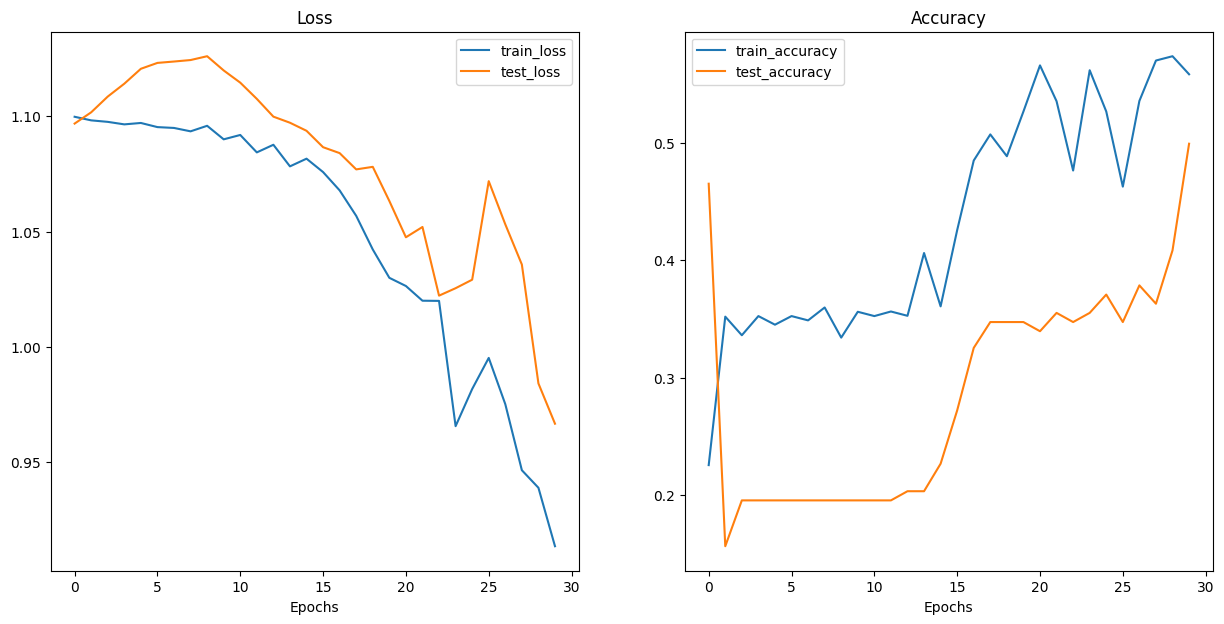

In [ ]:
plot_loss_curves(model_1_results)

## Model 2: with higher LR


In [ ]:
torch.manual_seed(42)
model_2 = TinyVGG(
    input_shape=3,
    hidden_units=32,
    output_shape=len(train_data_augmented.classes)).to(device)
model_2

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=3, bias=True)
  )
)

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 30

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.0003)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_2
model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Output()

Epoch: 1 | train_loss: 1.1021 | train_acc: 0.2840 | test_loss: 1.0904 | test_acc: 0.6562

Epoch: 2 | train_loss: 1.0970 | train_acc: 0.3873 | test_loss: 1.1062 | test_acc: 0.1953

Epoch: 3 | train_loss: 1.0950 | train_acc: 0.3634 | test_loss: 1.1254 | test_acc: 0.1953

Epoch: 4 | train_loss: 1.0932 | train_acc: 0.3524 | test_loss: 1.1352 | test_acc: 0.1953

Epoch: 5 | train_loss: 1.0929 | train_acc: 0.3451 | test_loss: 1.1431 | test_acc: 0.1953

Epoch: 6 | train_loss: 1.0850 | train_acc: 0.3675 | test_loss: 1.1313 | test_acc: 0.2031

Epoch: 7 | train_loss: 1.0774 | train_acc: 0.4025 | test_loss: 1.1123 | test_acc: 0.2266

Epoch: 8 | train_loss: 1.0697 | train_acc: 0.4257 | test_loss: 1.0977 | test_acc: 0.2564

Epoch: 9 | train_loss: 1.0539 | train_acc: 0.4620 | test_loss: 1.0909 | test_acc: 0.2642

Epoch: 10 | train_loss: 1.0269 | train_acc: 0.4735 | test_loss: 1.0541 | test_acc: 0.3395

Epoch: 11 | train_loss: 1.0473 | train_acc: 0.4686 | test_loss: 1.0389 | test_acc: 0.3551

Epoch: 12 | train_loss: 0.9533 | train_acc: 0.5846 | test_loss: 1.0314 | test_acc: 0.3473

Epoch: 13 | train_loss: 1.0111 | train_acc: 0.4804 | test_loss: 1.0141 | test_acc: 0.4006

Epoch: 14 | train_loss: 0.9312 | train_acc: 0.5346 | test_loss: 1.0819 | test_acc: 0.3018

Epoch: 15 | train_loss: 0.9779 | train_acc: 0.5460 | test_loss: 1.0083 | test_acc: 0.4006

Epoch: 16 | train_loss: 1.0131 | train_acc: 0.4889 | test_loss: 0.9654 | test_acc: 0.4162

Epoch: 17 | train_loss: 0.9533 | train_acc: 0.5238 | test_loss: 1.0788 | test_acc: 0.3018

Epoch: 18 | train_loss: 0.9387 | train_acc: 0.5729 | test_loss: 1.0136 | test_acc: 0.3707

Epoch: 19 | train_loss: 0.8972 | train_acc: 0.6088 | test_loss: 1.0080 | test_acc: 0.4474

Epoch: 20 | train_loss: 0.9006 | train_acc: 0.5932 | test_loss: 0.9763 | test_acc: 0.4396

Epoch: 21 | train_loss: 0.9061 | train_acc: 0.5932 | test_loss: 1.0121 | test_acc: 0.3487

Epoch: 22 | train_loss: 0.9339 | train_acc: 0.5389 | test_loss: 0.9849 | test_acc: 0.3487

Epoch: 23 | train_loss: 0.9812 | train_acc: 0.4808 | test_loss: 0.9082 | test_acc: 0.6214

Epoch: 24 | train_loss: 0.8748 | train_acc: 0.5734 | test_loss: 1.0484 | test_acc: 0.3565

Epoch: 25 | train_loss: 0.8872 | train_acc: 0.5817 | test_loss: 1.0470 | test_acc: 0.3331

Epoch: 26 | train_loss: 0.9082 | train_acc: 0.5470 | test_loss: 1.0880 | test_acc: 0.3253

Epoch: 27 | train_loss: 0.9207 | train_acc: 0.5665 | test_loss: 1.0399 | test_acc: 0.3331

Epoch: 28 | train_loss: 0.8463 | train_acc: 0.6244 | test_loss: 1.0361 | test_acc: 0.3487

Epoch: 29 | train_loss: 0.8528 | train_acc: 0.6244 | test_loss: 0.9796 | test_acc: 0.5227

Epoch: 30 | train_loss: 0.8293 | train_acc: 0.6235 | test_loss: 0.9914 | test_acc: 0.4851

Total training time: 112.055 seconds


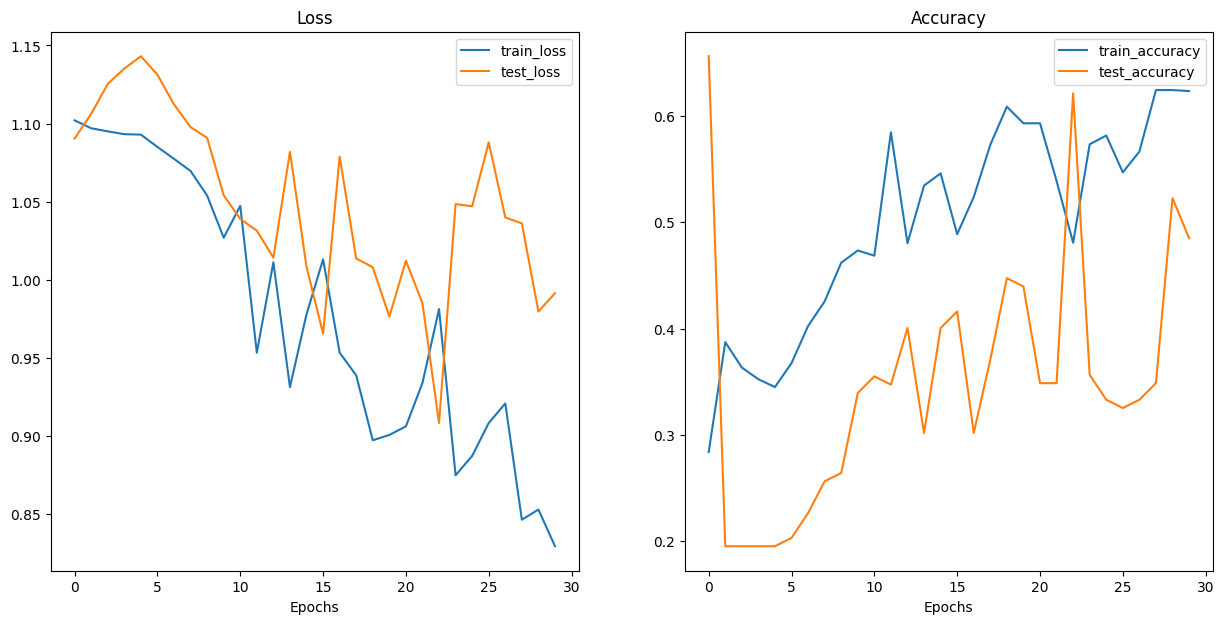

In [ ]:
plot_loss_curves(model_2_results)

In [ ]:
import pandas as pd
model_2_df = pd.DataFrame(model_2_results)
model_1_df = pd.DataFrame(model_1_results)
#model_0_df

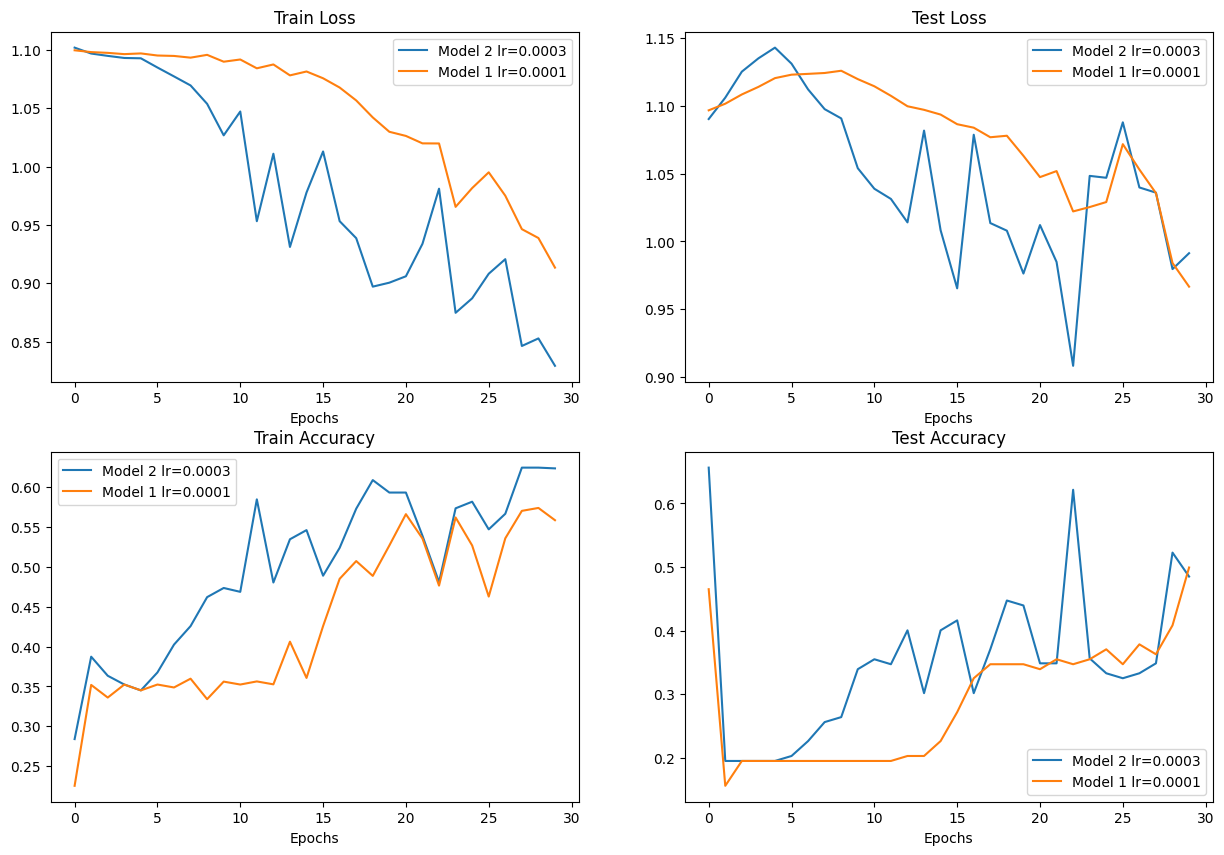

In [ ]:
plt.figure(figsize=(15, 10))

epochs = range(len(model_2_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_2_df["train_loss"], label="Model 2 lr=0.0003")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1 lr=0.0001")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_2_df["test_loss"], label="Model 2 lr=0.0003" )
plt.plot(epochs, model_1_df["test_loss"], label="Model 1 lr=0.0001")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_2_df["train_acc"], label="Model 2 lr=0.0003")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1 lr=0.0001")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_2_df["test_acc"], label="Model 2 lr=0.0003")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1 lr=0.0001")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

### Load and test custom images

In [ ]:
import torchvision
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide values between [0, 1]
    target_image = target_image / 255.

    # 3. Transform
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0))
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);
    print(target_image_pred_probs)

tensor([[0.3228, 0.3424, 0.3348]])


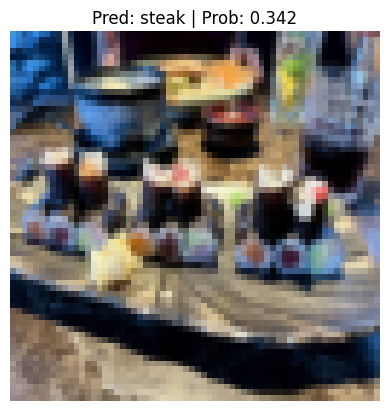

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    #transforms.ToTensor()
])

custom_image_path = "/content/sushi.jpg"
pred_and_plot_image(model=model_2,
                    image_path=custom_image_path,
                    class_names=train_data_augmented.classes,
                    transform=test_transform,
                    device=device
                    )


# 04. PyTorch Custom Datasets Exercises Template


In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.9.0+cpu


'cpu'

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [ ]:
# 1. Get data
import requests
import zipfile
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory exists")
else:
  image_path.mkdir(parents=True, exist_ok=True)

  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    zip_ref.extractall(image_path)




data/pizza_steak_sushi directory exists


In [ ]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Setup train and testing paths
#walk_through_dir(image_path)

train_dir = image_path / "train"
test_dir = image_path / "test"

walk_through_dir(train_dir), walk_through_dir(test_dir)

There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


(None, None)

pizza


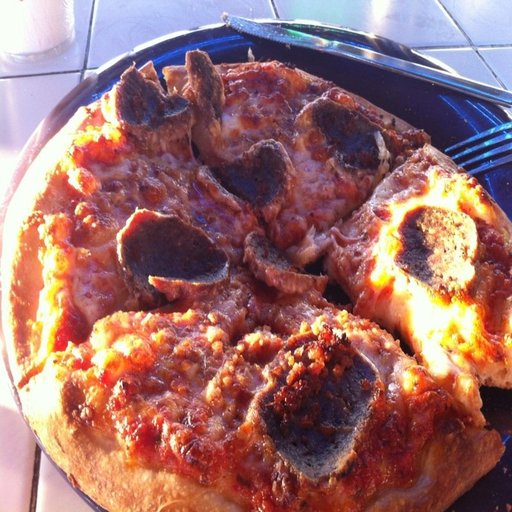

In [ ]:
# Visualize an image

import random
from PIL import Image

img_path_list = list(image_path.glob("*/*/*.jpg"))

random_img_path= random.choice(list(img_path_list))

image_class = random_img_path.parent.stem

random_img_sample = Image.open(random_img_path)

print(image_class)
random_img_sample

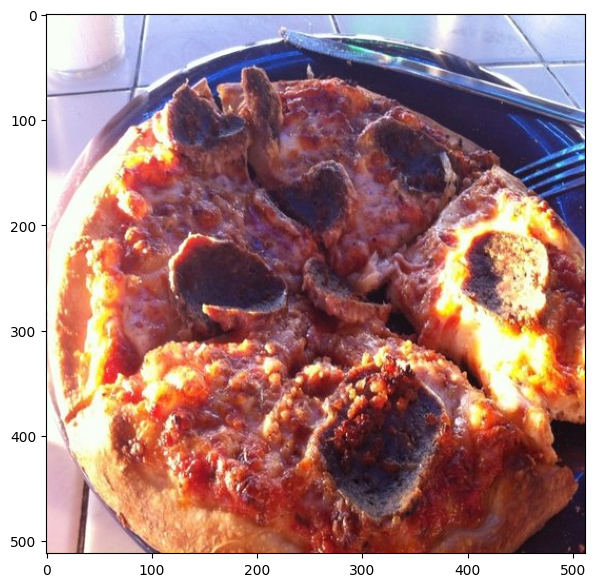

In [ ]:
# Do the image visualization with matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.imshow(random_img_sample)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [ ]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    #transforms.ToTensor()
])

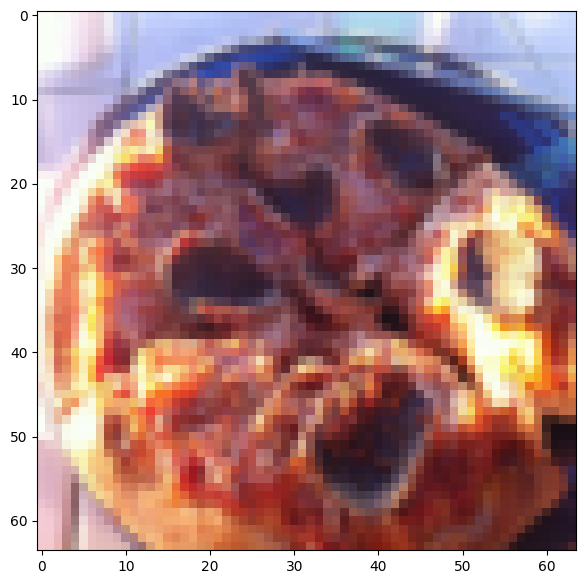

In [ ]:
# Write transform for turning images into tensors
img_tr = data_transform(random_img_sample)
plt.figure(figsize=(7,7))
plt.imshow(img_tr)

In [ ]:
# Write a function to plot transformed images
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

### Load image data using `ImageFolder`

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [ ]:

class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:

class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:

len(train_data), len(test_data)

(225, 75)

In [ ]:
# Turn train and test Datasets into DataLoaders
BATCH_SIZE = 16

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
len(train_dataloader), len(test_dataloader)

(15, 5)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [ ]:
### Create TinyVGG model class
import torch
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            #nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            #nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x
        #return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
model_exercise = TinyVGG(input_shape=3,
                         hidden_units=16,
                         output_shape=3)
model_exercise

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=3, bias=True)
  )
)

 # Create training and testing functions for model_0.

In [ ]:
def train_step(model: torch.nn.Module,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               dataloader: torch.utils.data.DataLoader,
               ):

  # Put model in training
  model.train()
  train_loss, train_acc = 0, 0
  # Get logits
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_logits = model(X)

    # Loss
    loss = loss_fn(y_logits, y)

    # Accumalate train loss
    train_loss += loss.item()

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # optimizer step
    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_logits)
  # Avarage loss and accuracy
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
               loss_fn: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               ):
  # Put model in Eval mode
  model.eval()

  # Initialize Metrics
  test_loss, test_acc = 0, 0

  # Loop through dataloader
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
        # Put data to target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_logits = model(X)

        # Calculate and accumualate test_loss
        loss = loss_fn(y_logits, y)
        test_loss += loss.item()

        # Calculate and accumualate test_acc
        y_pred_classes = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
        test_acc += (y_pred_classes == y).sum().item()/len(y_logits)


  # Avarage loss and accuracy
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [ ]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_exercise_0 = TinyVGG(input_shape=3,
                         hidden_units=16,
                         output_shape=3)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_exercise_0.parameters(),
                             lr=0.001)

# Start training
model_exercise_0_results = train(model=model_exercise_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1075 | train_acc: 0.2958 | test_loss: 1.0987 | test_acc: 0.2670
Epoch: 2 | train_loss: 1.1068 | train_acc: 0.3292 | test_loss: 1.0882 | test_acc: 0.4773
Epoch: 3 | train_loss: 1.0787 | train_acc: 0.4375 | test_loss: 1.0524 | test_acc: 0.4102
Epoch: 4 | train_loss: 0.9799 | train_acc: 0.5542 | test_loss: 1.0096 | test_acc: 0.4227
Epoch: 5 | train_loss: 0.8954 | train_acc: 0.5750 | test_loss: 1.0349 | test_acc: 0.4591


In [ ]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 20

model_exercise_1 = TinyVGG(input_shape=3,
                         hidden_units=16,
                         output_shape=3)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_exercise_1.parameters(),
                             lr=0.001)

# Start training
model_exercise_1_results = train(model=model_exercise_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1075 | train_acc: 0.2958 | test_loss: 1.0987 | test_acc: 0.2670
Epoch: 2 | train_loss: 1.1068 | train_acc: 0.3292 | test_loss: 1.0882 | test_acc: 0.4773
Epoch: 3 | train_loss: 1.0787 | train_acc: 0.4375 | test_loss: 1.0524 | test_acc: 0.4102
Epoch: 4 | train_loss: 0.9799 | train_acc: 0.5542 | test_loss: 1.0096 | test_acc: 0.4227
Epoch: 5 | train_loss: 0.8954 | train_acc: 0.5750 | test_loss: 1.0349 | test_acc: 0.4591
Epoch: 6 | train_loss: 0.8471 | train_acc: 0.6125 | test_loss: 1.0421 | test_acc: 0.4648
Epoch: 7 | train_loss: 0.9193 | train_acc: 0.5792 | test_loss: 1.0382 | test_acc: 0.4420
Epoch: 8 | train_loss: 0.8743 | train_acc: 0.5500 | test_loss: 1.0048 | test_acc: 0.4648
Epoch: 9 | train_loss: 0.7555 | train_acc: 0.6667 | test_loss: 1.0152 | test_acc: 0.4966
Epoch: 10 | train_loss: 0.7262 | train_acc: 0.6583 | test_loss: 1.0257 | test_acc: 0.5398
Epoch: 11 | train_loss: 0.6910 | train_acc: 0.6833 | test_loss: 1.0101 | test_acc: 0.5205
Epoch: 12 | train_l

In [ ]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 50

model_exercise_2 = TinyVGG(input_shape=3,
                         hidden_units=16,
                         output_shape=3)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_exercise_2.parameters(),
                             lr=0.001)

# Start training
model_exercise_2_results = train(model=model_exercise_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1075 | train_acc: 0.2958 | test_loss: 1.0987 | test_acc: 0.2670
Epoch: 2 | train_loss: 1.1068 | train_acc: 0.3292 | test_loss: 1.0882 | test_acc: 0.4773
Epoch: 3 | train_loss: 1.0787 | train_acc: 0.4375 | test_loss: 1.0524 | test_acc: 0.4102
Epoch: 4 | train_loss: 0.9799 | train_acc: 0.5542 | test_loss: 1.0096 | test_acc: 0.4227
Epoch: 5 | train_loss: 0.8954 | train_acc: 0.5750 | test_loss: 1.0349 | test_acc: 0.4591
Epoch: 6 | train_loss: 0.8471 | train_acc: 0.6125 | test_loss: 1.0421 | test_acc: 0.4648
Epoch: 7 | train_loss: 0.9193 | train_acc: 0.5792 | test_loss: 1.0382 | test_acc: 0.4420
Epoch: 8 | train_loss: 0.8743 | train_acc: 0.5500 | test_loss: 1.0048 | test_acc: 0.4648
Epoch: 9 | train_loss: 0.7555 | train_acc: 0.6667 | test_loss: 1.0152 | test_acc: 0.4966
Epoch: 10 | train_loss: 0.7262 | train_acc: 0.6583 | test_loss: 1.0257 | test_acc: 0.5398
Epoch: 11 | train_loss: 0.6910 | train_acc: 0.6833 | test_loss: 1.0101 | test_acc: 0.5205
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 20

model_exercise_3 = TinyVGG(input_shape=3,
                         hidden_units=32,
                         output_shape=3)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_exercise_3.parameters(),
                             lr=0.001)

# Start training
model_exercise_3_results = train(model=model_exercise_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1111 | train_acc: 0.3667 | test_loss: 1.0897 | test_acc: 0.3466
Epoch: 2 | train_loss: 1.1000 | train_acc: 0.3250 | test_loss: 1.0817 | test_acc: 0.4273
Epoch: 3 | train_loss: 1.0647 | train_acc: 0.4042 | test_loss: 0.9985 | test_acc: 0.4284
Epoch: 4 | train_loss: 1.0122 | train_acc: 0.4333 | test_loss: 1.0127 | test_acc: 0.4466
Epoch: 5 | train_loss: 0.9661 | train_acc: 0.5208 | test_loss: 1.0129 | test_acc: 0.4341
Epoch: 6 | train_loss: 0.9270 | train_acc: 0.4917 | test_loss: 1.0750 | test_acc: 0.3852
Epoch: 7 | train_loss: 0.9049 | train_acc: 0.5583 | test_loss: 1.0590 | test_acc: 0.4534
Epoch: 8 | train_loss: 0.8193 | train_acc: 0.6583 | test_loss: 1.1161 | test_acc: 0.4284
Epoch: 9 | train_loss: 0.8817 | train_acc: 0.5875 | test_loss: 1.0647 | test_acc: 0.4341
Epoch: 10 | train_loss: 0.7237 | train_acc: 0.7250 | test_loss: 1.0524 | test_acc: 0.4295
Epoch: 11 | train_loss: 0.6621 | train_acc: 0.7542 | test_loss: 1.2051 | test_acc: 0.4170
Epoch: 12 | train_l

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [ ]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.


Excellent, we now have double the training and testing images...

In [ ]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [ ]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.TrivialAugmentWide(num_magnitude_bins=5),
  transforms.ToTensor()
])

# Create datasets
train_data_20 = datasets.ImageFolder(root=train_data_20_percent_path,
                                  transform=simple_transform)

test_data_20 = datasets.ImageFolder(root=test_data_20_percent_path,
                                  transform=simple_transform)


# Create dataloaders
BATCH_SIZE = 16

train_dataloader_20 = DataLoader(train_data_20,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader_20 = DataLoader(test_data_20,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

In [ ]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 20

model_exercise_4 = TinyVGG(input_shape=3,
                         hidden_units=16,
                         output_shape=3)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_exercise_4.parameters(),
                             lr=0.0003)

# Start training
model_exercise_4_results = train(model=model_exercise_4,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0989 | train_acc: 0.3000 | test_loss: 1.0916 | test_acc: 0.4398
Epoch: 2 | train_loss: 1.0279 | train_acc: 0.4792 | test_loss: 1.0267 | test_acc: 0.4773
Epoch: 3 | train_loss: 0.8784 | train_acc: 0.6208 | test_loss: 0.9883 | test_acc: 0.4659
Epoch: 4 | train_loss: 0.7855 | train_acc: 0.6792 | test_loss: 0.9672 | test_acc: 0.5102
Epoch: 5 | train_loss: 0.7559 | train_acc: 0.6500 | test_loss: 0.9688 | test_acc: 0.4841
Epoch: 6 | train_loss: 0.7434 | train_acc: 0.6250 | test_loss: 0.9310 | test_acc: 0.5648
Epoch: 7 | train_loss: 0.6370 | train_acc: 0.7792 | test_loss: 0.9172 | test_acc: 0.5352
Epoch: 8 | train_loss: 0.6069 | train_acc: 0.7417 | test_loss: 0.8447 | test_acc: 0.5841
Epoch: 9 | train_loss: 0.6496 | train_acc: 0.7125 | test_loss: 0.8397 | test_acc: 0.5977
Epoch: 10 | train_loss: 0.5364 | train_acc: 0.7750 | test_loss: 0.9927 | test_acc: 0.5273
Epoch: 11 | train_loss: 0.5517 | train_acc: 0.7708 | test_loss: 0.8191 | test_acc: 0.6205
Epoch: 12 | train_l